In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#installing google play API
!pip install google-play-scraper

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.0-cp37-none-any.whl size=24086 sha256=512b1e0e95db4202fb6e601e4ada98a003beac4baa0a089d391133bcea2ad07a
  Stored in directory: /root/.cache/pip/wheels/e9/98/5a/917dd15a6f100d35a26c5f6f0ae99895ae861aff74fafa1b08
Successfully built google-play-scraper


In [4]:
#install watermark
!pip install watermark

  Found existing installation: importlib-metadata 4.5.0
    Uninstalling importlib-metadata-4.5.0:
      Successfully uninstalled importlib-metadata-4.5.0


In [5]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

pandas             : 1.1.5
matplotlib         : 3.2.2
seaborn            : 0.11.1
google_play_scraper: 1.0.0



In [7]:
# importing all the required Libraries
import glob
import json
import csv
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer 
import re
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [8]:
#choosing  some apps
# e.g. enter this URL: it.rortos.airfighters
app_name=input("Enter URL from google playstore")
app_packages = [
  
   app_name
    
    
]

Enter URL from google playstoreit.rortos.airfighters


In [9]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


In [10]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))
#print_json(app_infos)

In [11]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,AirFighters,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,"10,000,000+",10000000,3.778313,136989,48477,"[26090, 6787, 11775, 19083, 73254]",0,True,USD,False,None,None,None,True,$4.99 - $22.99 per item,47M,5.0,5.0 and up,RORTOS,8013171132272394676,support@rortos.com,http://www.rortos.com,Via del Pontiere 11\n37122 Verona VR\nItaly,http://www.rortos.it/PRIVACY/,8013171132272394676,Simulation,GAME_SIMULATION,https://play-lh.googleusercontent.com/kBM32tkN...,https://play-lh.googleusercontent.com/svJikMhe...,[https://play-lh.googleusercontent.com/BcCFKz_...,None,None,Teen,"Violence, Blood",True,True,"Nov 7, 2015",1614765282,4.2.5,Bug fixes,Bug fixes,False,it.rortos.airfighters,https://play.google.com/store/apps/details?id=...


In [12]:
app_infos_df.shape

(1, 49)

In [13]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 1/1 [00:04<00:00,  4.03s/it]


In [14]:
print_json(app_reviews[0])

{
  "appId": "it.rortos.airfighters",
  "at": "2021-04-24 05:58:35",
  "content": "It is a great game deserves 5 stars. But if your going to make a game free to install for goodness sake make the game free. After three days that you've installed it it takes away most capabilities of playing and you have to buy the war pack. Come on. Seriously?",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "4.2.5",
  "reviewId": "gp:AOqpTOHXOaG8pGoBvnqkvCrfFeJW8FfNAOo6BdJHQaztSe2FijFHLtD5pwxkL1kJypWoU7OHHmXa5jbvwSXv_A",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 51,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJxC0PYB_MwsgQkqI6yVuVz0w7ezZN20_PVouJdt=mo",
  "userName": "Jimmy Eason"
}



In [15]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHXOaG8pGoBvnqkvCrfFeJW8FfNAOo6BdJHQaz...,Jimmy Eason,https://play-lh.googleusercontent.com/a/AATXAJ...,It is a great game deserves 5 stars. But if yo...,1,51,4.2.5,2021-04-24 05:58:35,None,NaT,most_relevant,it.rortos.airfighters
1,gp:AOqpTOFHDgqzJf1tY8xYtpLpLyrpodZFpGlm5SMFF3c...,JuordenJenesis Lewis,https://play-lh.googleusercontent.com/a-/AOh14...,100% a cash grab. Spent 5.00$ on the F-35 thin...,1,10,4.2.5,2021-05-19 03:16:48,None,NaT,most_relevant,it.rortos.airfighters


In [16]:
app_reviews_df_all_reviews_rating_data=pd.DataFrame(app_reviews_df,columns={"content","score"})

In [17]:
app_reviews_df_all_reviews_rating_data.head()

,score,content
0,1,It is a great game deserves 5 stars. But if yo...
1,1,100% a cash grab. Spent 5.00$ on the F-35 thin...
2,1,No options for controls. Poor graphics. Ace fi...
3,1,I have downloaded this game twice now on my Sa...
4,1,I love games but this! Uh uh. It's a total mes...


In [18]:
app_reviews_df_all_reviews_rating_data.to_csv('reviews.csv', index=None, header=True)

In [19]:
reviews_data=pd.read_csv("reviews.csv")
reviews_data.head()

,score,content
0,1,It is a great game deserves 5 stars. But if yo...
1,1,100% a cash grab. Spent 5.00$ on the F-35 thin...
2,1,No options for controls. Poor graphics. Ace fi...
3,1,I have downloaded this game twice now on my Sa...
4,1,I love games but this! Uh uh. It's a total mes...


In [20]:
reviews_data_rating5 = reviews_data[reviews_data["score"]==5]
reviews_data_rating5.tail()

,score,content
1195,5,still and for ever love with this game
1196,5,What anoce game!!!
1197,5,Best game ever made
1198,5,Nice one
1199,5,Good


In [21]:
def stemming(tokens):
    #ps=PorterStemmer()
    ps = WordNetLemmatizer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.lemmatize(x))
    return stem_words

In [22]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in reviews_data_rating5["content"]:
        text = val.lower()
        all_stopwords_gensim =STOPWORDS.union(set(['game','nt']))
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in all_stopwords_gensim]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [27]:
def plot_Cloud(wordCloud):
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
reviews_data_rating5_wordcloud = WordCloud(background_color='black',width=900, height=500).generate(create_Word_Corpus(reviews_data_rating5))

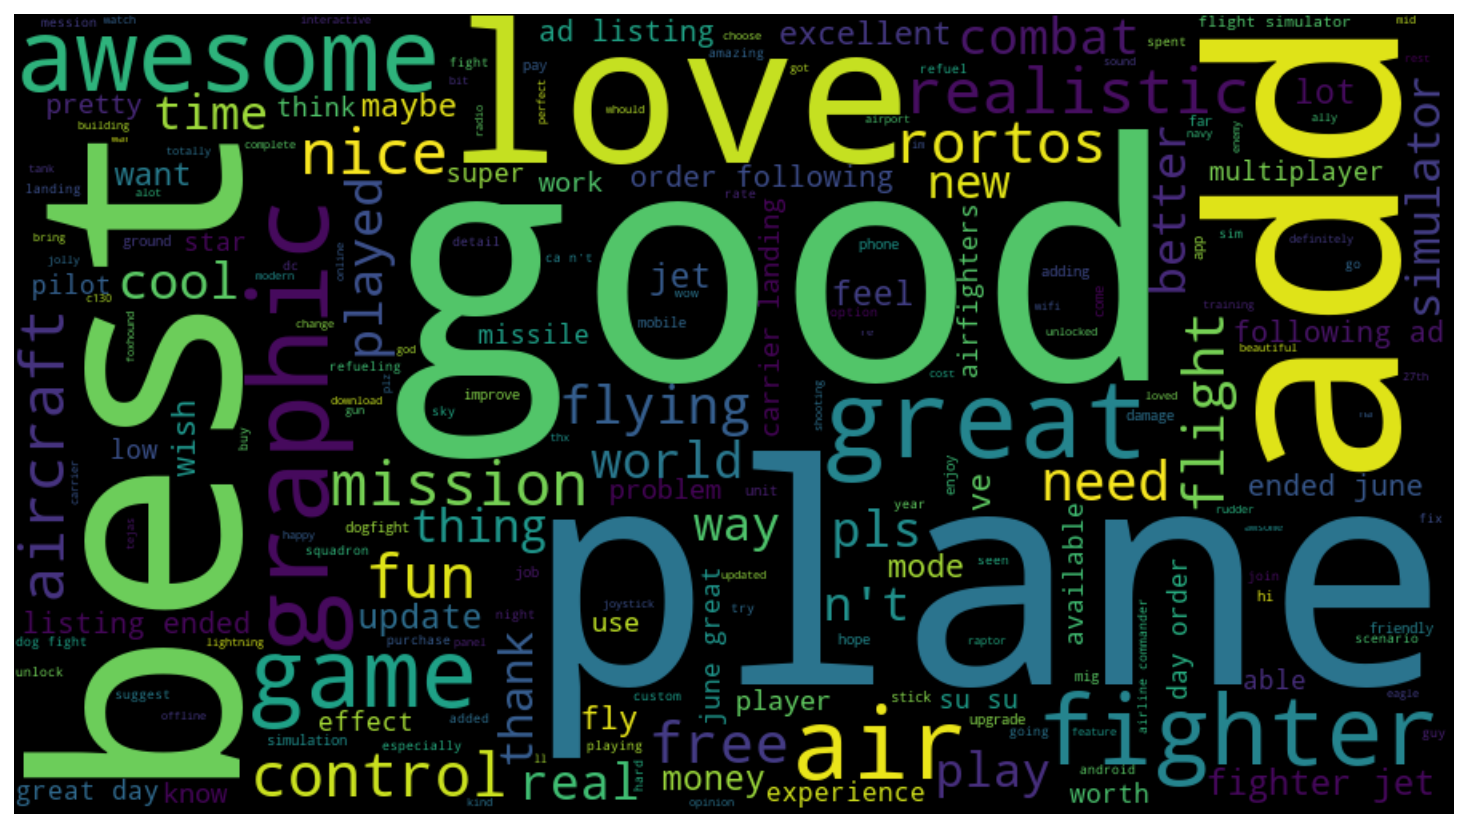

In [32]:
plot_Cloud(reviews_data_rating5_wordcloud)

In [33]:
reviews_data_rating1 = reviews_data[reviews_data["score"]==1]
reviews_data_rating1.tail()

,score,content
195,1,Poor game and too many ads
196,1,"You have to buy dog fighting, it's not very fun!"
197,1,Waste of time
198,1,"For couple days it's functional, however after..."
199,1,So bad


In [34]:
def create_Word_Corpus_for_rating1(df):
    words_corpus = ''
    for val in reviews_data_rating1["content"]:
        text = val.lower()
        all_stopwords_gensim =STOPWORDS.union(set(['game','t','n','`','V','e']))
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in all_stopwords_gensim]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [35]:
reviews_data_rating1_wordcloud = WordCloud(background_color='black',width=900, height=500).generate(create_Word_Corpus_for_rating1(reviews_data_rating1))

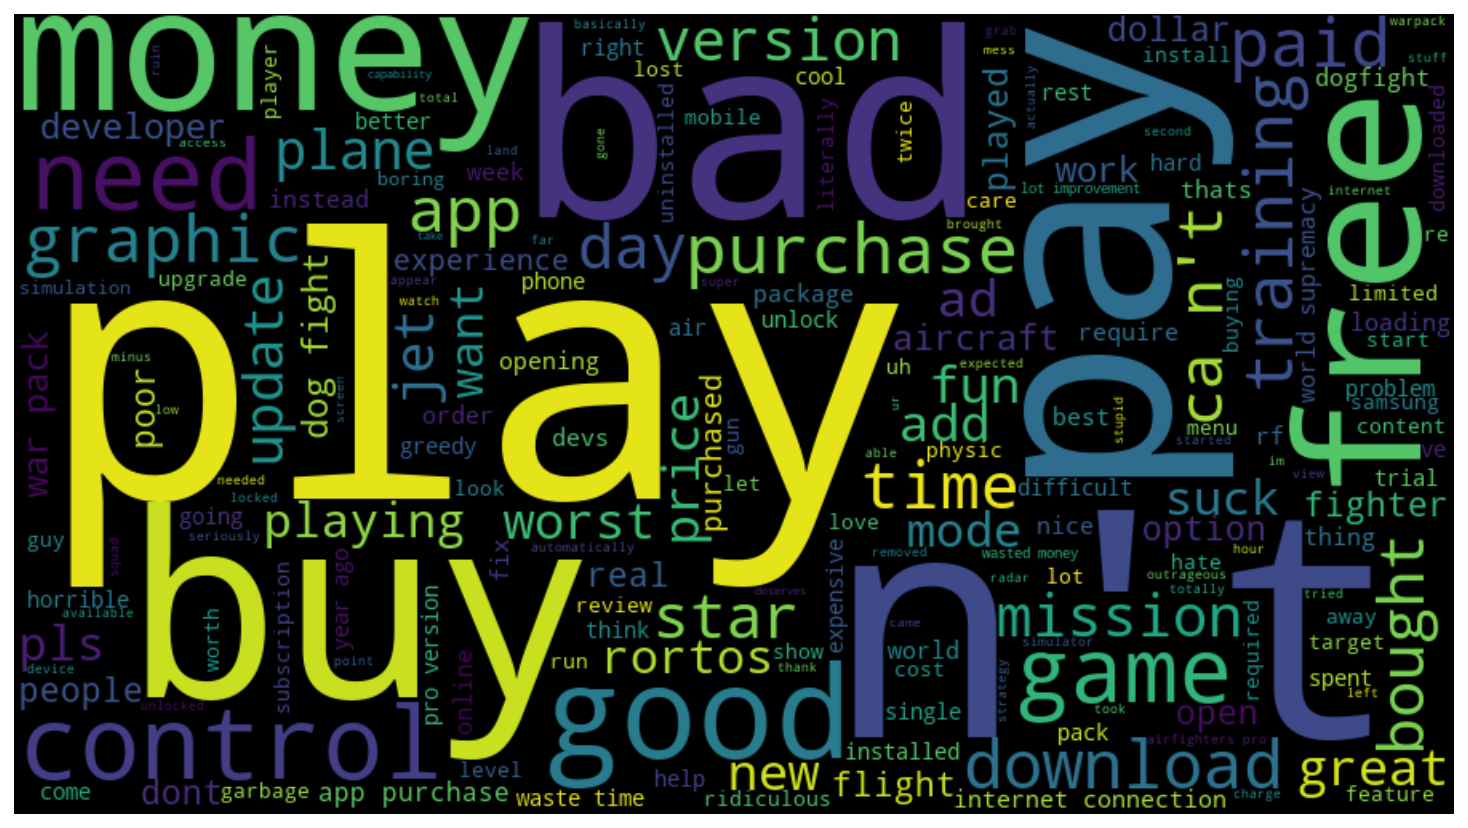

In [36]:
plot_Cloud(reviews_data_rating1_wordcloud)